In [66]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
# Parameters
model_to_use = 'pymer' # "pymer" or "rf"

In [61]:
# Read in effective AOH results
if model_to_use == 'pymer':
    aoh_info_fp = '/Users/emiliolr/Desktop/effective_aoh_info_pymer.csv'
elif model_to_use == 'rf':
    aoh_info_fp = '/Users/emiliolr/Desktop/effective_aoh_info_rf.csv'
    
aoh_info = pd.read_csv(aoh_info_fp)

In [62]:
# Read in taxonomic + body mass info for tropical mammal species
tropical_mammals_fp = '/Users/emiliolr/Google Drive/My Drive/LIFE/datasets/derived_datasets/tropical_species/tropical_mammals_taxonomic_info_w_body_mass.csv'
tropical_mammals = pd.read_csv(tropical_mammals_fp)

#  join on tropical mammal info w/effective AOH results
aoh_info = pd.merge(aoh_info, tropical_mammals, how = 'left', left_on = 'species', right_on = 'iucn_id')
aoh_info = aoh_info.drop(columns = ['iucn_id', 'synonyms', 'is_species', 'combine_match_species', 
                                    'combine_bm_match_level'])

In [63]:
# Read in percent overlap w/tropical forest zone info (just current AOH overlap)
aoh_pct_overlap_fp = '/Users/emiliolr/Desktop/tropical_mammals_aoh_overlap.csv'
aoh_pct_overlap = pd.read_csv(aoh_pct_overlap_fp)
aoh_pct_overlap = aoh_pct_overlap.rename(columns = {'aoh_pct_overlap' : 'aoh_pct_overlap_current'})

#  join on percent overlap info w/effective AOH results
aoh_info = pd.merge(aoh_info, aoh_pct_overlap, how = 'left', left_on = 'species', right_on = 'iucn_id')
aoh_info = aoh_info.drop(columns = ['iucn_id'])

In [64]:
# Adding columns to represent AOH percent changes: negative if AOH loss, positive if gain
aoh_info['hl_pct_loss'] = (aoh_info['current_aoh_total'] / aoh_info['human_absent_aoh_total']) - 1
aoh_info['hp_pct_loss'] = (aoh_info['human_absent_aoh_w_hunting_total'] / aoh_info['human_absent_aoh_total']) - 1
aoh_info['hl_hp_pct_loss'] = (aoh_info['current_aoh_w_hunting_total'] / aoh_info['human_absent_aoh_total']) - 1

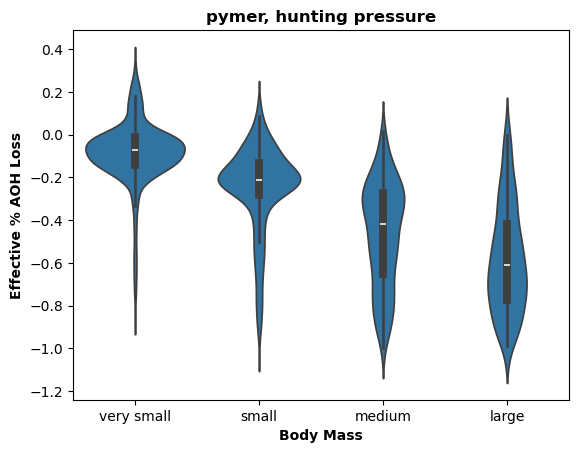

In [74]:
# Plotting by the same body mass categories as Gallego-Zamorano
def bm_cats(bm):
    if bm < 0.1:
        return 'very small'
    elif (bm >= 0.1) and (bm < 1):
        return 'small'
    elif (bm >= 1) and (bm < 10):
        return 'medium'
    else:
        return 'large'

aoh_info['body_mass_cat'] = (aoh_info['combine_body_mass'] / 1000).apply(bm_cats)

#  plotting effective AOHs
bm_cat_order = ['very small', 'small', 'medium', 'large']
sns.violinplot(data = aoh_info, x = 'body_mass_cat', y = 'hp_pct_loss', order = bm_cat_order)

plt.xlabel('Body Mass', weight = 'bold')
plt.ylabel('Effective % AOH Loss', weight = 'bold')
plt.title(f'{model_to_use}, hunting pressure', weight = 'bold')

plt.show()